In [1]:
from google.colab import files
uploaded = files.upload()



Saving All the Intermediate Colleges in Pakistan.csv to All the Intermediate Colleges in Pakistan.csv


**Loading the Dataset**

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('All the Intermediate Colleges in Pakistan.csv')

# Preview the first few rows of the dataset
df.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


**Data Cleaning**

In [3]:
# Check the structure of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Summary of numerical data (if applicable)
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


,Name,Location,Study Program,Sector,Affiliation,Rating
count,1630,1626,1630,1101,155,1630
unique,1630,1573,774,2,97,21
top,Campus.pk Lahore,Chakwal,FA ICS Computer Science FSc Pre Medical FSc Pr...,Private,University of Sargodha,0*
freq,1,11,49,562,7,1119


**Converting the values**

In [4]:
# Convert all values in 'Rating' column to strings, replace '*', and convert back to numeric
df['Rating'] = df['Rating'].astype(str).str.replace('*', '').astype(float)


**Distribution Graph**

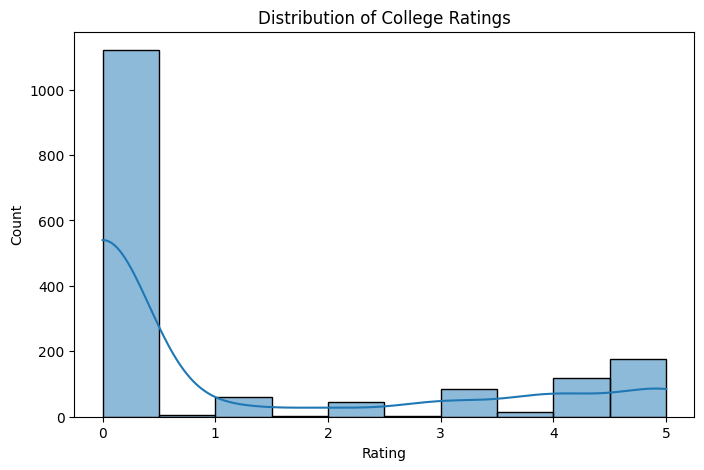

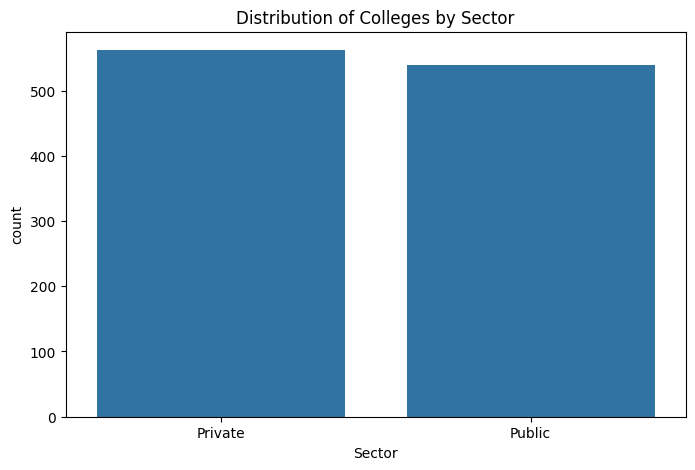

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of College Ratings')
plt.show()

# Distribution of Sector (Public vs Private)
plt.figure(figsize=(8, 5))
sns.countplot(x='Sector', data=df)
plt.title('Distribution of Colleges by Sector')
plt.show()


**Analyzing the Programs**

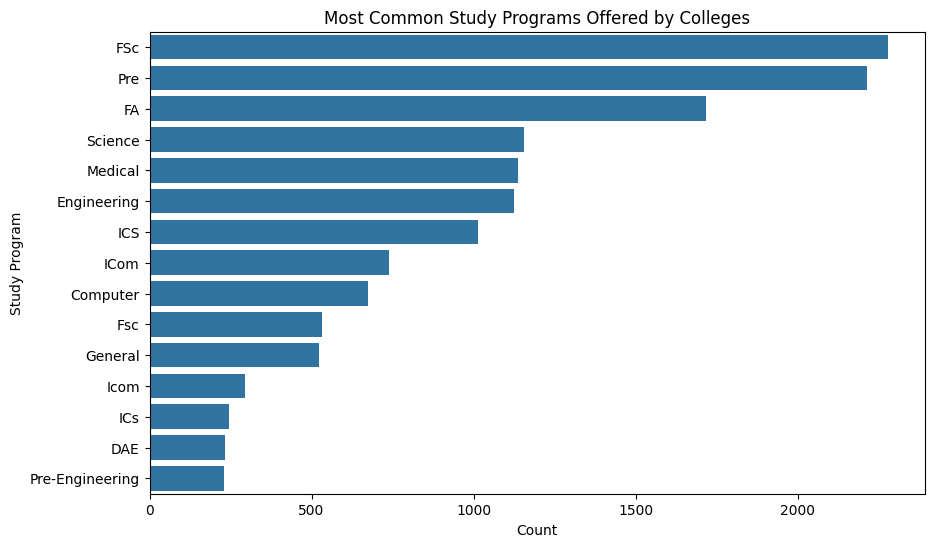

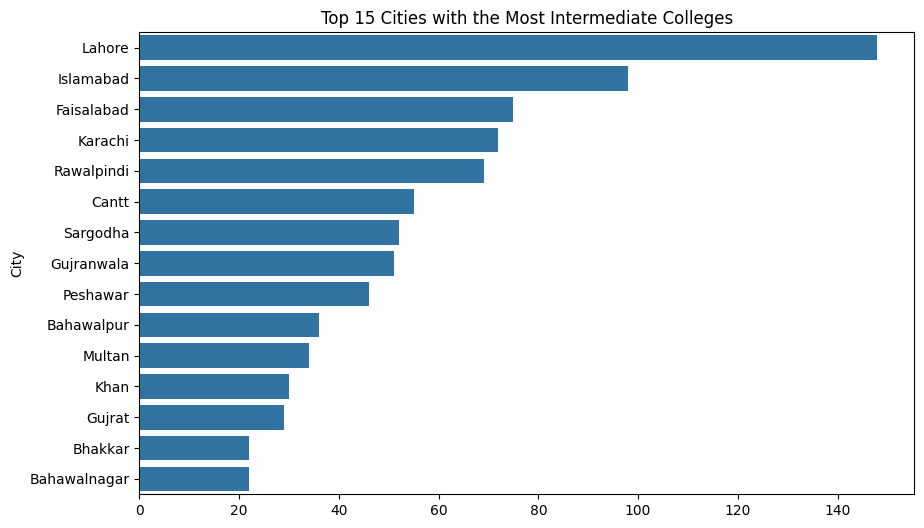

In [6]:
# Analyzing study programs
from collections import Counter

# Splitting and counting study programs
study_programs = df['Study Program'].str.split(expand=True).stack()
program_counts = Counter(study_programs)

# Plotting the most common study programs
program_df = pd.DataFrame(program_counts.most_common(15), columns=['Study Program', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Study Program', data=program_df)
plt.title('Most Common Study Programs Offered by Colleges')
plt.show()

# Location analysis (City-wise distribution)
df['City'] = df['Location'].apply(lambda x: str(x).split()[-1] if pd.notnull(x) else 'Unknown')
city_counts = df['City'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Top 15 Cities with the Most Intermediate Colleges')
plt.show()

**Average Rating by Cities**

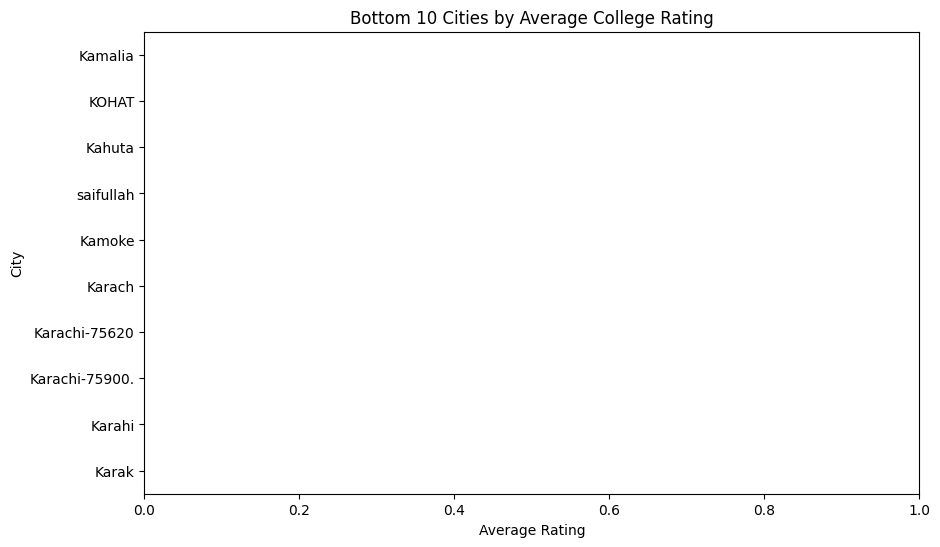

In [7]:
# Calculate the average rating by city
city_ratings = df.groupby('City')['Rating'].mean().sort_values()

# Display the bottom 10 cities with the lowest average ratings
bottom_cities = city_ratings.head(10)

# Plot the bottom cities by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_cities.values, y=bottom_cities.index)
plt.title('Bottom 10 Cities by Average College Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.xlim(0, 1)  # Set a fixed range for the x-axis
bottom_cities = city_ratings[city_ratings > 0].head(10)

plt.show()

**Comparision of Private vs Public**

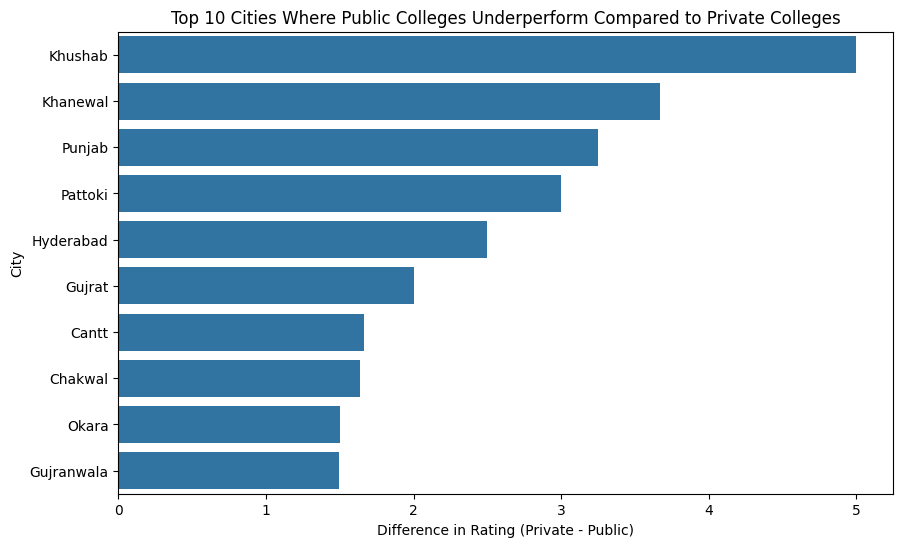

In [8]:
# Calculate the average rating by sector (Public vs Private) for each city
sector_city_ratings = df.groupby(['City', 'Sector'])['Rating'].mean().unstack()

# Calculate the difference between Private and Public ratings for each city
sector_city_ratings['Difference'] = sector_city_ratings['Private'] - sector_city_ratings['Public']

# Display the top cities where public colleges underperform compared to private colleges
underperforming_cities = sector_city_ratings.sort_values('Difference', ascending=False).head(10)

# Plot the difference between Private and Public colleges in top underperforming cities
plt.figure(figsize=(10, 6))
sns.barplot(x=underperforming_cities['Difference'], y=underperforming_cities.index)
plt.title('Top 10 Cities Where Public Colleges Underperform Compared to Private Colleges')
plt.xlabel('Difference in Rating (Private - Public)')
plt.ylabel('City')
plt.show()

**Conclucion**

This Exploratory Data Analysis (EDA) work goes through the intermediate colleges in Pakistan with an aim of determining the performance and even distribution of the colleges. The key findings include:


1. **Ratings Distribution:** Many colleges were given a rating of 0 mainly due to poor or lack of ratings.
2. **Sector Comparison:** there was fairly equal participation of private and public organizations, nevertheless certain cities had a dissimilar performance calendar between the private and public sectors.
3. **Cities Needing Intervention:** And most of the cities such as Kamalia, KOHAT,and Karak were gave lower average ratings. Experts have found out that public colleges in Khushab, Khanewal, and Punjab are far less productive than private ones, though these might also be the areas that are in need of educational enhancement.